<a href="https://colab.research.google.com/github/johyunkang/py_pandas/blob/main/python_ml_guide_01_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scikit-Learn

#### 사이킷런 패키지 내의 모듈명은 **sklearn** 으로 시작하는 명명규칙
- sklearn.datasets : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임
- sklearn.tree : 트리기반 ML 알고리즘을 구현한 클래스의 모임
- sklearn.model_selection : 학습데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼파라미터로 평가하기 위한 다양한 모듈의 모임

In [ ]:
import sklearn
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


print('sklearn version:', sklearn.__version__)

print('# 붓꽃 데이터 세트를 로딩')
iris = load_iris()

# iris.data 는 Iris 데이터 세트에서 피처(Feature)만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

print(' iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있음')
iris_label = iris.target
print('iris target value:', iris_label)
print('iris target name:', iris.target_names)

print('\n  붓꽃 데이터 세트를 자세히 보기 위해 DF 로 변환 ')
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target

#label 0 : Setosa 품종, 1: versicolor 품종, 2: virginica 품종
print(iris_df.head(10))


print('\n train 데이터와 test 데이터를 분리하기 위해 train_test_split 함수 사용')
# train_test_split 파라미터 정보 : 1: 피처 데이터 세트, 2: Label 데이터 세트, 3: 테스트 데이터 비율, 4: 동일 난수발생을 위한 seed 값. (아무값이나  입력해도 됨)
rd_seed = 99
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=rd_seed)

print('\n DecisionTreeClassifier 객체 생성')
dt_clf = DecisionTreeClassifier(random_state = rd_seed)

print('\n 학습수행')
dt_clf.fit(x_train, y_train)

print('\n 학습이 완료된 DTC 객체에서 테스트 데이터 세트로 예측 수행')
pred = dt_clf.predict(x_test)

# scikit-learn은 정확도 측정을 위해 accuracy_score 함수 제공 파라미터 1: 실제 레이블 데이터 세트, 2: 예측 레이블 데이터 세트
print('\n 예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))


sklearn version: 0.22.2.post1
# 붓꽃 데이터 세트를 로딩
 iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있음
iris target value: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target name: ['setosa' 'versicolor' 'virginica']

  붓꽃 데이터 세트를 자세히 보기 위해 DF 로 변환 
   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  label
0             5.1                3.5    ...             0.2        0
1             4.9                3.0    ...             0.2        0
2             4.7                3.2    ...             0.2        0
3             4.6                3.1    ...             0.2        0
4             5.0                3.6    ...             0.2        0
5             5.4                3.9    ...             0.4        0
6   

### 위의 붓꽃 데이터 세트 분류를 예측한 프로세스를 정리하면 다음과 같음
1. 데이터 세트 분리 : 데이터를 학습 데이터와 테스트 데이터로 분리
2. 모델 학습 : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킵니다.
3. 예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측
4. 평가 : 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가함

### 내장된 예제 데이터 세트
분류나 회귀 연습용 데이터 세트
- datasets.load_boston() : 회귀 용도이며, 미국 보스톤의 집 피처들과 가격에 대한 데이터 세트
- datasets.load_breast_cancer() : 분류 용도이며, 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트
- datasets.load_diabetes() : 회귀 용도이며, 당뇨 데이터 세트
- datasets.load_digits() : 분류 용도이며, 0에서 9까지 숫자의 이미지 픽셀 데이터 세트
- datasets.load_iris() : 분류 용도이며, 붓꽃에 대한 피처를 가진 데이터 세트

분류와 클러스터링을 위한 표본 데이터 생성기
- datasets.make_classifications() : 분류를 위한 데이터 세트를 만듦. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성해줌
- datasets.make_blobs() : 클러스터링을 위한 데이터 세트를 무작위로 생성해줌. 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트를 쉽게 만들어줌

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))
print('Bunch 클래스는 파이썬 딕셔너리 자료형과 유사')

keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들: ', keys)

<class 'sklearn.utils.Bunch'>
Bunch 클래스는 파이썬 딕셔너리 자료형과 유사
붓꽃 데이터 세트의 키들:  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


### 데이터 키의 의미
![sklearn_keys](https://user-images.githubusercontent.com/291782/137591893-a0d34994-a696-464c-9532-60ad647b1cfe.png)
> 이미지 출처 : [파이썬 머신러닝 완벽 가이드](http://www.kyobobook.co.kr/product/detailViewKor.laf?ejkGb=KOR&mallGb=KOR&barcode=9791158391928&orderClick=LEA&Kc=) p.98 

In [ ]:
print('\n feature_name 의 type:', type(iris_data.feature_names))
print('feature_names 의 shape:', len(iris_data.feature_names))
print('iris_data.feature_names:\n', iris_data.feature_names)

print('\n target_name의 type:', type(iris_data.target_names))
print('target_name의 shape:', len(iris_data.target_names))
print('iris_data.target_names:', iris_data.target_names)

print('\n data의 type:', type(iris_data.data))
print('data의 shape:', iris_data.data.shape)
print('iris_data[data]:', iris_data['data'][1:10]) # data 양이 많아 10줄만 나오게 1:10

print('\n target의 type:', type(iris_data.target))
print('target의 shape:', iris_data.target.shape)
print('iris_data.target:', iris_data.target) # data 양이 많아 10줄만 나오게 1:10



 feature_name 의 type: <class 'list'>
feature_names 의 shape: 4
iris_data.feature_names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_name의 type: <class 'numpy.ndarray'>
target_name의 shape: 3
iris_data.target_names: ['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
data의 shape: (150, 4)
iris_data[data]: [[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

 target의 type: <class 'numpy.ndarray'>
target의 shape: (150,)
iris_data.target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Model Selection 모듈 소개
#### 학습 / 테스트 데이터 세트 분리 - train_test_split()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dtc = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dtc.fit(train_data, train_label)

print('\n 학습 데이터 세트로 예측 수행')
pred = dtc.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))
# 위 정확도 1.0 이 나오는건 train 데이터로 test를 진행했기 때문


 학습 데이터 세트로 예측 수행
예측 정확도: 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dtc = DecisionTreeClassifier()
iris_data = load_iris()

# train data와 test data를 7:3 으로 분리
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, \
                                                    test_size = 0.3, random_state = 121)

dtc.fit(x_train, y_train)
pred = dtc.predict(x_test)
print('예측 정확도:{0:.5f}'.format(accuracy_score(y_test, pred)))


예측 정확도:0.95556


### 교차검증
#### K-Fold 교차검증

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dtc = DecisionTreeClassifier(random_state = 156)

print(' 5개의 폴드 세트로 분리되는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성')
kfold = KFold(n_splits = 5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

n_iter = 0

# KFold 객체의 split()을 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  x_train, x_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  # 학습 및 예측
  dtc.fit(x_train, y_train)
  pred = dtc.predict(x_test)
  n_iter += 1

  # 반복 시 마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = x_train.shape[0]
  test_size = x_test.shape[0]
  print('\n {0} 교차 검증 정확도: {1}, 학습데이터 크기: {2}, 검증 데이터 크기:{3}'
        .format(n_iter, accuracy, train_size, test_size))
  print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 저확도 계산
print('\n  ## 평균 검증 정확도:', np.mean(cv_accuracy))

 5개의 폴드 세트로 분리되는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
붓꽃 데이터 세트 크기: 150

 1 교차 검증 정확도: 1.0, 학습데이터 크기: 120, 검증 데이터 크기:30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

 2 교차 검증 정확도: 0.9667, 학습데이터 크기: 120, 검증 데이터 크기:30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

 3 교차 검증 정확도: 0.8667, 학습데이터 크기: 120, 검증 데이터 크기:30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

 4 교차 검증 정확도: 0.9333, 학습데이터 크기: 120, 검증 데이터 크기:30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

 5 교차 검증 정확도: 0.7333, 학습데이터 크기: 120, 검증 데이터 크기:30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

  ## 평균 검증 정확도: 0.9


#### Stratified K 폴드


In [ ]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

kfold = KFold(n_splits = 3)
n_iter = 0

## 학습 레이블과 검증 레이블에 속하는 데이터의 분포가 일정하지 않아 올바른 예측이 되지 않는 문제의 예시
for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('\n ## 교차검증: {0}'.format(n_iter))
  print('## 학습 레이블 데이터 분포: \n', label_train.value_counts())
  print('## 검증 레이블 데이터 분포: \n', label_test.value_counts())
  


 ## 교차검증: 1
## 학습 레이블 데이터 분포: 
 2    50
1    50
Name: label, dtype: int64
## 검증 레이블 데이터 분포: 
 0    50
Name: label, dtype: int64

 ## 교차검증: 2
## 학습 레이블 데이터 분포: 
 2    50
0    50
Name: label, dtype: int64
## 검증 레이블 데이터 분포: 
 1    50
Name: label, dtype: int64

 ## 교차검증: 3
## 학습 레이블 데이터 분포: 
 1    50
0    50
Name: label, dtype: int64
## 검증 레이블 데이터 분포: 
 2    50
Name: label, dtype: int64


In [ ]:
# 위 KFold 의 문제를 StratifiedKFold 로 해결하는 예시
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3)
n_iter = 0

# KFold 와 다르게 StratifiedKFold 는 인자로 레이블 데이터 세트가 필수(KFold는 옵션)
for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]

  print('\n \n ## 교차검증:', n_iter)
  print('\n 학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('\n 검증 레이블 데이터 분포:\n', label_test.value_counts())



 
 ## 교차검증: 1

 학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64

 검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64

 
 ## 교차검증: 2

 학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64

 검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64

 
 ## 교차검증: 3

 학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64

 검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64


In [ ]:
# StratifiedKFold 를 이용해 데이터를 분리
dtc = DecisionTreeClassifier(random_state = 156)

skf = StratifiedKFold(n_splits = 3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold 의 split() 호출 시 반드시 레이블 데이터 세트도 입력 필요
for train_index, test_index in skf.split(features, label):
  #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  x_train, x_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  #학습 및 예측
  dtc.fit(x_train, y_train)
  pred = dtc.predict(x_test)

  # 반복 시마다 정확성 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = x_train.shape[0]
  test_size = x_test.shape[0]

  print('\n {0} 교차검증 정확도:{1}, 학습데이터 크기:{2}, 검증데이터 크기:{3}'
        .format(n_iter, accuracy, train_size, test_size))
  print('# {0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n ## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


 1 교차검증 정확도:0.98, 학습데이터 크기:100, 검증데이터 크기:50
# 1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

 2 교차검증 정확도:0.94, 학습데이터 크기:100, 검증데이터 크기:50
# 2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

 3 교차검증 정확도:0.98, 학습데이터 크기:100, 검증데이터 크기:50
# 3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

 ## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


### 교차 검증을 보다 간편하게 - cross_val_score()

```python
cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0
              , fit_params=None, pre_dispatch='2*n_jobs')
```
위 파라미터 중 **estimator, X, y, scoring, cv**가 주요 파라미터이다
- estimator : 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor를 의미함
- X : 피처 데이터 세트
- y : 레이블 데이터 세트
- scoring : 예측 성능 평가 지표를 기술
- cv : 교차 검증 폴드 수를 의미

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
import numpy as np


iris_data = load_iris()
dtc = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dtc, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

# cross_validate 는 직접 찾아봐라

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

GridSearchCV 클래스의 생성자에 들어가는 주요 파라미터
- estimator : classifier, regressor, pipeline이 상요될 수 있음
- param_grid : key + 리스트 값을 가지는 딕셔너리가 주어짐. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정함
- scoring : 예측 성능을 측정할 평가 방법을 지정함. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열(예: 정확도의 경우 'accuracy') 로 지정하거나 별도의 성능 평가 지표 함수도 지정할 수 잇음
- cv : 교차검증을 위해 분할되는 학습/테스트 세트의 개수
- refit : 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습 시킴


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size = 0.2, random_state=121)

dtc = DecisionTreeClassifier()

# 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold 로 나누어 테스트 수행 설정
# refit=True 가 default임. True 이면 가장 좋은 파라미터 설정으로 재학습시킴
grid_tree = GridSearchCV(dtc, param_grid=parameters, cv=3, refit=True)


# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_tree.fit(x_train, y_train)

# GridSearchCV 결과를 추출해 DF로 변환
scores_df = pd.DataFrame(grid_tree.cv_results_)

print('# pandas option 표시')
# print(pd.describe_option())

pd.set_option('display.width', 800)
pd.set_option('display.max_row', 20)
pd.set_option('display.max_columns', 20)

print(scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']])
# scores_df

print('GridSearchCV 최적 파라미터:', grid_tree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_tree.best_score_))

# GridSearchCV 의 refit으로 이미 학습된 estimator 반환
estimator = grid_tree.best_estimator_

# GridSearchCV의 best_estimator_ 는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(x_test)
print('테스트 데이터 세트 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

# pandas option 표시
                                     params  mean_test_score  rank_test_score  split0_test_score  split1_test_score  split2_test_score
0  {'max_depth': 1, 'min_samples_split': 2}         0.700000                5              0.700                0.7               0.70
1  {'max_depth': 1, 'min_samples_split': 3}         0.700000                5              0.700                0.7               0.70
2  {'max_depth': 2, 'min_samples_split': 2}         0.958333                3              0.925                1.0               0.95
3  {'max_depth': 2, 'min_samples_split': 3}         0.958333                3              0.925                1.0               0.95
4  {'max_depth': 3, 'min_samples_split': 2}         0.975000                1              0.975                1.0               0.95
5  {'max_depth': 3, 'min_samples_split': 3}         0.975000                1              0.975                1.0               0.95
GridSearchCV 최적 파라미터: {'max_depth': 

> 위 scores_df 의 컬럼별 의미
-  **rank_test_score**가 params(하이퍼 파라미터) 별로 측정 랭킹을 나타내며 1이 가장 좋은 결과(순위)임.
- **params** 컬럼에는 수행할 때마다 적용된 개별 하이퍼 파라미터 값을 나타냄
- **mean_test_score** 점수는 **split0_test_score, split1_test_score, split2_test_score** 3개 컬럼의 평균 값을 의미

### 데이터 전처리
- 레이블 인코딩(Label encoding)
 - 카테고리 피처를 코드형 숫자값으로 변환하는 것
 - 예) TV, 냉장고, 전자레인지 > 1, 2, 3
 - 레이블 인코딩은 선형회귀와 같은 ML 알고리즘에는 적용하지 않아야 함
 - 이유는 숫자 변환값이 순서나 중요도가 없는데 이를 인식해서 가중치를 달리하기 때문
 - 트리 계열의 ML 알고리즘에만 레이블 인코딩 사용해야 함
- 원핫 인코딩(One Hot encoding)
 - 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식
 - 행 형태의 피처값을 열 형태로 차원을 변환하는 방식
 - 주의사항 1 : OneHotEncoder로 변환하기 전 모든 문자열 값이 숫자형 값으로 변환돼야 함
 - 주의사항 2 : 입력값으로 2차원 데이터가 필요하다는 점

#### 레이블 인코딩 (Label encoding)
![label-encoding](https://user-images.githubusercontent.com/291782/137861006-40d215c8-95eb-44b2-abca-1e031f7cf211.png)


In [ ]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환전 값:', items)
print('인코딩 변환후 값:', labels)

print('인코딩 클래스:', encoder.classes_)

# decoding
print('디코딩 원본값:', encoder.inverse_transform(labels))

인코딩 변환전 값: ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
인코딩 변환후 값: [0 1 4 5 3 3 2 2]
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값: ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


#### 원핫 인코딩
![one-hot-encoding](https://user-images.githubusercontent.com/291782/137861549-cd403912-0451-4849-9ba7-27005e78b190.png)

In [ ]:
# 원 핫 인코딩
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('LabelEncoding Labels:', labels)

# 2차원 데이터로 변환
labels2d = labels.reshape(-1, 1)
print('\n 2차원 Labels:\n', labels2d)

# 원핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels2d)
oh_labels = oh_encoder.transform(labels2d)

print('\n 원핫인코딩 데이터')
print(oh_labels.toarray())

print('\n 원-핫 인코딩 차원')
print(oh_labels.shape)

LabelEncoding Labels: [0 1 4 5 3 3 2 2]

 2차원 Labels:
 [[0]
 [1]
 [4]
 [5]
 [3]
 [3]
 [2]
 [2]]

 원핫인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]

 원-핫 인코딩 차원
(8, 6)


위 원핫인코딩 데이터 설명 그림
![one-hot-encoding-desc](https://user-images.githubusercontent.com/291782/137863139-5dc566ff-2139-49d5-beb1-c46bbe6cc3c8.png)

#### 원핫 인코딩을 쉽게 지원하는 API
**get_dummies()**


In [ ]:
import pandas as pd

pd.set_option('display.width', 800)
pd.set_option('display.max_row', 20)
pd.set_option('display.max_columns', 20)

df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})

print('DF')
print(df)

print(pd.get_dummies(df))

DF
    item
0     TV
1    냉장고
2  전자레인지
3    컴퓨터
4    선풍기
5    선풍기
6     믹서
7     믹서
   item_TV  item_냉장고  item_믹서  item_선풍기  item_전자레인지  item_컴퓨터
0        1         0        0         0           0         0
1        0         1        0         0           0         0
2        0         0        0         0           1         0
3        0         0        0         0           0         1
4        0         0        0         1           0         0
5        0         0        0         1           0         0
6        0         0        1         0           0         0
7        0         0        1         0           0         0


### 피처 스케일링 정규화
서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링(feature scaling)이라고 함.

대표적인 방법
- 표준화(Standardization)
 - 평균이 0, 분산이 1인 가우시안 정규분포를 가진 값으로 변환하는 것을 의미
 - 원본 값에서 피처의 평균을 뺀 값을 피처 x의 표준편차로 나눈 값
 - $x_iNew = \dfrac {x_i - mean(x)} {stdev(x)}$
- 정규화(Normalization)
 - 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해 주는 개념
 - 원본 값에서 피처 x의 최솟값을 뺀 값을 피처 x의 최대값과 최솟값의 차이로 나눈 값
 - $x_iNew = \dfrac {x_i - min(x)} {max(x) - min(x)}$
 - 사이킷런의 Normalizer 모듈과 일반적인 정규화는 약간의 차이가 있음
 - 사이킷런의 Normalizer는 선형대수에서의 정규화 개념이 적용
 - 즉, 개별 벡터를 모든 피처 벡터의 크기로 나눠줌
 - 예) 세개의 피처 x, y, z 가 있으면
 - $x_iNew = \dfrac {x_i} {\sqrt{x_i^2 + y_i^2 + z_i^2}}$



#### StandardScaler
표준화를 쉽게 지원하기 위한 클래스

개별 피처를 평균이 0, 분산이 1 인 값으로 변환해줌

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('iris_df 값\n', iris_df.head(10))

print('\n feature 들의 평균 값')
print(iris_df.mean())

print('\n feature 들의 분산 값')
print(iris_df.var())

iris_df 값
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1
feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

 

In [ ]:
# StandardScaler를 이용해 각 피처를 한 번에 표준화 변환 방법
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환. fit() 과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
print('iris_scaled 데이터 일부\n', iris_scaled[0:10])

# transform() 시 스케일 변환된 데이터 세트가 numpy ndarray로 반환돼 이를 DF로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('\n')
print('feature 들의 평균 값')
print(iris_df_scaled.mean())

print('\n feature 들의 분산 값')
print(iris_df_scaled.var())

iris_scaled 데이터 일부
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

 feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### MinMaxScaler
데이터 값을 0과 1 사이의 범위 값으로 변환함 (음수 값이 있으면 -1에서 1 값으로 변환)

데이터 분포가 가우시안 분포가 아닐 경우에는 MinMaxScaler를 적용해 볼 수 있음

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMax 생성
mms_scaler = MinMaxScaler()

# mMS 로 데이터 세트 변환. fit() 과 transform() 호출
mms_scaler.fit(iris_df)
mms_iris_scaled = mms_scaler.transform(iris_df)
print('MMS 스케일된 값 일부 type:ndarray')
print(mms_iris_scaled[0:10])

# transform() 시 스케일 변환된 데이터 세트가 numpy ndarray 로 반환 돼 이를 DF로 변환
mms_iris_df_scaled = pd.DataFrame(data = mms_iris_scaled, columns = iris.feature_names)
print('\n')
print('MMS Scaled DF')
print(mms_iris_df_scaled.head(10))

print('\n')
print('feature 들의 최솟값:', mms_iris_df_scaled.min())
print('\n')
print('feature 들의 최댓값:', mms_iris_df_scaled.max())


MMS 스케일된 값 일부 type:ndarray
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]]


MMS Scaled DF
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667
5           0.305556          

#### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

Scaler 객체를 이용해 학습 데이터 세트로 fit() 과 transform()을 적용하면

테스트 **데이터 세트로는 다시 fit()을 수행하지 않고**, 학습 데이터 세트로 fit()을
수행한 결과를 이용해 transform() 변환을 적용해야 함

즉, 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 함

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10 까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train = np.arange(0,11).reshape(-1,1) # -1, 1 은 11, 1과 같음. reshape(11,1)
test = np.arange(0, 6).reshape(-1, 1) # -1, 1 은 6, 1과 같음. reshape(6, 1)

# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0 ~ 1 값으로 변환
mms = MinMaxScaler()

# fit()하게 되면 train 데이터의 최솟값이 0, 최댓값이 10 으로 설정
mms.fit(train)

# 1/10 scale로 train 데이터 변환함. 원본 10 => 1, 1 => 0.1 로 변환됨
train_scaled = mms.transform(train)
print('train scale 전\n', np.round(train.reshape(-1), 2))
print('\n train scale 후\n', np.round(train_scaled.reshape(-1), 2))

# MinMaxScaler 에 test 데이터를 fit() 하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
mms.fit(test)

# 1/5 scale로 test 데이터 변환홤. 원본 5 => 1로 변환
test_scaled = mms.transform(test)
print('\n')
print('test scale 전\n', np.round(test.reshape(-1), 2))
print('\n test scale 후\n', np.round(test_scaled.reshape(-1), 2))

# 위 출력결과를 확인하면 train 과 test 의 스케일링이 맞지 않음을 확인 가능
# 머신러닝은 반드시 train 데이터를 기반으로 학습되기 때문에 test 데이터는 train 데이터의 스케일링 기준에 맞춰야 함
# 다음은 train 과 test 가 동일한 scaling 이 적용된 예제
print('\n')
print('#### test 데이터에 fit을 호출하지 않고 transform() 했을 때 변화')
mms.fit(train)
train_scaled1 = mms.transform(train)
print('train scale 전\n', np.round(train.reshape(-1), 2))
print('\n train scale 후\n', np.round(train_scaled1.reshape(-1), 2))

# test 데이터에 scale 변환을 할 때 fit()을 호출하지 않고, transform()만으로 변환해야 함!!
test_scaled1 = mms.transform(test)
print('\n')
print('test scale 전\n', np.round(test.reshape(-1), 2))
print('\n test scale 후\n', np.round(test_scaled1.reshape(-1), 2))

train scale 전
 [ 0  1  2  3  4  5  6  7  8  9 10]

 train scale 후
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


test scale 전
 [0 1 2 3 4 5]

 test scale 후
 [0.  0.2 0.4 0.6 0.8 1. ]


#### test 데이터에 fit을 호출하지 않고 transform() 했을 때 변화
train scale 전
 [ 0  1  2  3  4  5  6  7  8  9 10]

 train scale 후
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


test scale 전
 [0 1 2 3 4 5]

 test scale 후
 [0.  0.1 0.2 0.3 0.4 0.5]


### 타이타닉 생존자 예측

컬럼 설명
- passengerid : 탑승자 데이터 일련번호
- survived : 0(사망),  1(생존)
- pclass : 선실등급, 1(일등석), 2(이등석), 3
- sex : 탑승자 성별
- name : 이름
- age: 나이
- sibsp : 같이 탑승한 형제자매 또는 배우자 인원수
- parch : 같이 탑승한 부모님 또는 어린이 인원수
- ticket : 티켓번호
- fare : 요금
- cabin : 선실 번호
- embarked : 중간 정착 항구 C (Cherbourg), Q (Queenstown), S (Southampton)



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanic/train.csv')
df.head()

print('## 학습 데이터 정보 ##')
print(df.info())

# 결측치 데이터 처리
# age : 평균나이로 대체
# 나머지 컬럼의 NaN은 'N' 값으로 대체
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('N', inplace=True)
df['Embarked'].fillna('N', inplace=True)
print('\n')
print('데이터 세트 null 값 개수', df.isnull().sum().sum())

print('\n')
print('Sex 값 분포:\n', df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', df['Embarked'].value_counts())


## 학습 데이터 정보 ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


데이터 세트 null 값 개수 0


Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
D                3
              ... 
B71     

Cabin 첫 글자만 잘라낸 결과
0    N
1    C
2    N
3    C
4    N
5    N
6    E
7    N
8    N
9    N
Name: Cabin, dtype: object

## 성별에 따른 생존자 수 비교

생존자 수 시각화
AxesSubplot(0.125,0.125;0.775x0.755)

 성별과 등급에 따른 시각화


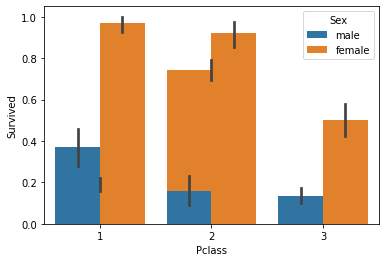

In [15]:
# 위 결과 데이터에서 cabin의 경우 C23, C25 C27 과 같은 값은 C 앞자리만 잘라내기 
df['Cabin'] = df['Cabin'].str[0:1]
print('Cabin 첫 글자만 잘라낸 결과')
print(df['Cabin'].head(10))

# 성별에 따른 생존자 수 비교
print('\n## 성별에 따른 생존자 수 비교')
df.groupby(['Sex', 'Survived'])['Survived'].count()

# 생존자 수 시각화 (barplot)
# x축 : Sex 컬럼, y축 : Survived 컬럼
print('\n생존자 수 시각화')
sns.barplot(x='Sex', y='Survived', data=df)




 성별과 등급에 따른 시각화


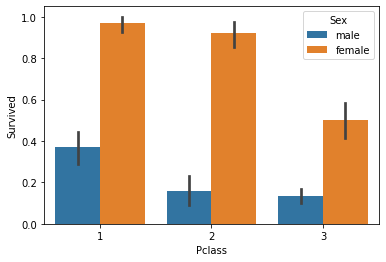

In [16]:
print('\n 성별과 등급에 따른 시각화')
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

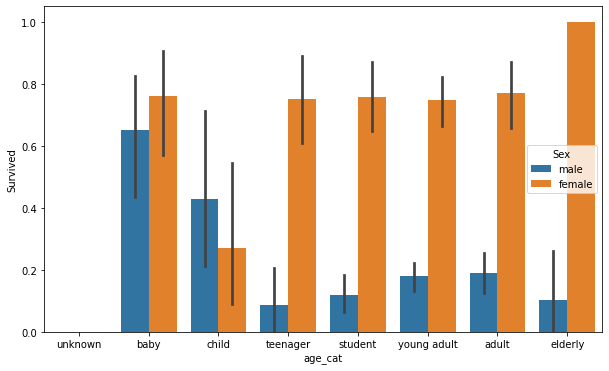

In [19]:
# 입력 age 에 따라 구분 값을 반환하는 함수 설정. DF의 apply lambda 식 사용
def get_category(age):
  cat = ''
  if age <= -1 : cat='unknown'
  elif age <= 5 : cat='baby'
  elif age <=12 : cat='child'
  elif age <= 18 : cat='teenager'
  elif age <= 25 : cat='student'
  elif age <= 35 : cat='young adult'
  elif age <= 60 : cat='adult'
  else : cat='elderly'

  return cat

# 막대 그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['unknown', 'baby', 'child', 'teenager', 'student', 'young adult', 'adult', 'elderly']

# lambda 식에 get_category() 함수를 반환값으로 지정
df['age_cat'] = df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='age_cat', y='Survived', hue='Sex', data=df, order=group_names)
df.drop('age_cat', axis=1, inplace=True)

In [20]:
# 남아있던 문자열 카테고리 피처를 숫자형 피처로 변환
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

df = encode_features(df)
print(df.head(10))

   PassengerId  Survived  Pclass  ...     Fare  Cabin  Embarked
0            1         0       3  ...   7.2500      7         3
1            2         1       1  ...  71.2833      2         0
2            3         1       3  ...   7.9250      7         3
3            4         1       1  ...  53.1000      2         3
4            5         0       3  ...   8.0500      7         3
5            6         0       3  ...   8.4583      7         2
6            7         0       1  ...  51.8625      4         3
7            8         0       3  ...  21.0750      7         3
8            9         1       3  ...  11.1333      7         3
9           10         1       2  ...  30.0708      7         0

[10 rows x 12 columns]


#### 지금까지 작성한 내용을 정리하고 함수로 설정

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline



# null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace=True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
 
  return df


# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

  return df


# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1] # 앞자리 대문자 1자리만 잘라내기
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])

  return df


# 앞에서 설정한  데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

# 원본 데이터를 로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanic/train.csv')
print(df.head(5))

y_df = df['Survived']
x_df = df.drop('Survived', axis=1)

# 위에서 작성한 함수 이용하여 전처리 실행
x_df = transform_features(x_df)

# train_test_split() 이용하여 train (80%), test(20%) 구분
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state = 11)


# DecisionTree, 랜덤 포레스트, 로지스틱 회귀 이용하여 확률 계산
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 각 모형의 클래스 생성
dt = DecisionTreeClassifier(random_state = 11)
rf = RandomForestClassifier(random_state = 11)
# lr = LogisticRegression(solver='lbfgs')
lr = LogisticRegression()

# DecisionTree 학습 / 예측 / 평가
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
print('\n ### DecisionTree 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 랜덤 포레스트 학습 / 예측 / 평가
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print('\n #### 랜덤 포레스트 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 로직스틱 회귀 학습 / 예측 / 평가
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
print('\n ### 로지스틱 회귀 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))


   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

 ### DecisionTree 정확도:0.7877

 #### 랜덤 포레스트 정확도:0.8547

 ### 로지스틱 회귀 정확도:0.8492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
# 교차 검증으로 DecisionTree 모델을 조금 더 평가
# KFold, cross_val_score(), GridSearchCV 

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  print('### KFold 교차 검증 ###')
  #폴더 세트 5개인 KFold 객체 생성, 폴더 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold = KFold(n_splits = folds)
  scores = []

  # KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(x_df)):
    # x_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    x_train, x_test = x_df.values[train_index], x_df.values[test_index]
    y_train, y_test = y_df.values[train_index], y_df.values[test_index]

    # Classifier 학습, 예측, 정확도 계산
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    scores.append(accuracy)
    print('## 교차 검증 {0} 정확도 {1:.4f}'.format(iter_count, accuracy))
  
  # 5개 fold에서의 평균 정확도 계산
  mean_score = np.mean(scores)
  print('\n ## 평균 정확도:{0:.4f}'.format(mean_score))

# exec_kfold 호출
exec_kfold(dt, folds=5)

## 교차 검증 0 정확도 0.7542
## 교차 검증 1 정확도 0.7809
## 교차 검증 2 정확도 0.7865
## 교차 검증 3 정확도 0.7697
## 교차 검증 4 정확도 0.8202

 ## 평균 정확도:0.7823


In [31]:
# cross_val_score() API를 이용해 수행
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, x_df, y_df, cv=5)
print('### cross_val_score() 교차 검증 ###')
for iter_count, accuracy in enumerate(scores):
  print('## 교차검증 {0} 정확도 {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도:{0:.4f}'.format(np.mean(scores)))
# cross_val_score() 와 KFold 평균 정확도가 다른 이유는
# cross_val_score() 는 StratifiedKFold 를 이용하기 때문

### cross_val_score() 교차 검증 ###
## 교차검증 0 정확도 0.7430
## 교차검증 1 정확도 0.7753
## 교차검증 2 정확도 0.7921
## 교차검증 3 정확도 0.7865
## 교차검증 4 정확도 0.8427
평균 정확도:0.7879


In [34]:
# GridSearchCV 
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
              'min_samples_split':[2, 3, 5],
              'min_samples_leaf':[1, 5, 8]}

gscv = GridSearchCV(dt, param_grid=parameters, scoring='accuracy', cv=5)
gscv.fit(x_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', gscv.best_params_)
# 최적 파라미터는 mat_depth는 3, min_samples_split은 2, min_samples_leaf는 5 로 선정

print('GridSearchCV 최고 정확도:{0:.4f}'.format(gscv.best_score_))
best_dclf = gscv.best_estimator_
print('\n## best_estimator_ :\n', best_dclf)


# GridSearchCV의 최적 하이퍼 파라미터로 학습 된 Estimator로 예측 및 평가 수행
dpred = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpred)
print('\n ## 테스트 세트에서 DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.7992

## best_estimator_ :
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

 ## 테스트 세트에서 DecisionTreeClassifier 정확도:0.8715
